In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px # For high-level plotting
import plotly.io as pio # For renderer settings
import kaleido

In [2]:
df = pd.read_csv(r'C:\Users\Vstore Computer\Datasets\Global_Superstore2.csv', encoding='latin-1')

### Data Understanding

In [3]:
pd.set_option('display.max_columns', None)
df.head()

Row ID         Order ID  Order Date   Ship Date     Ship Mode Customer ID  \
0   32298   CA-2012-124891  31-07-2012  31-07-2012      Same Day    RH-19495   
1   26341    IN-2013-77878  05-02-2013  07-02-2013  Second Class    JR-16210   
2   25330    IN-2013-71249  17-10-2013  18-10-2013   First Class    CR-12730   
3   13524  ES-2013-1579342  28-01-2013  30-01-2013   First Class    KM-16375   
4   47221     SG-2013-4320  05-11-2013  06-11-2013      Same Day     RH-9495   

      Customer Name      Segment           City            State  \
0       Rick Hansen     Consumer  New York City         New York   
1     Justin Ritter    Corporate     Wollongong  New South Wales   
2      Craig Reiter     Consumer       Brisbane       Queensland   
3  Katherine Murray  Home Office         Berlin           Berlin   
4       Rick Hansen     Consumer          Dakar            Dakar   

         Country  Postal Code  Market   Region        Product ID    Category  \
0  United States      10024.0      US     East   TEC-AC-10003033  Technology   
1      Australia          NaN    APAC  Oceania   FUR-CH-10003950   Furniture   
2      Australia          NaN    APAC  Oceania   TEC-PH-10004664  Technology   
3        Germany          NaN      EU  Central   TEC-PH-10004583  Technology   
4        Senegal          NaN  Africa   Africa  TEC-SHA-10000501  Technology   

  Sub-Category                                       Product Name     Sales  \
0  Accessories  Plantronics CS510 - Over-the-Head monaural Wir...  2309.650   
1       Chairs          Novimex Executive Leather Armchair, Black  3709.395   
2       Phones                  Nokia Smart Phone, with Caller ID  5175.171   
3       Phones                     Motorola Smart Phone, Cordless  2892.510   
4      Copiers                     Sharp Wireless Fax, High-Speed  2832.960   

   Quantity  Discount    Profit  Shipping Cost Order Priority  
0         7       0.0  762.1845         933.57       Critical  
1         9       0.1 -288.7650         923.63       Critical  
2         9       0.1  919.9710         915.49         Medium  
3         5       0.1  -96.5400         910.16         Medium  
4         8       0.0  311.5200         903.04       Critical

In [4]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [5]:
df.shape

(51290, 24)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.isna().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [9]:
df.describe().T

count          mean           std       min           25%  \
Row ID         51290.0  25645.500000  14806.291990     1.000  12823.250000   
Postal Code     9994.0  55190.379428  32063.693350  1040.000  23223.000000   
Sales          51290.0    246.490581    487.565361     0.444     30.758625   
Quantity       51290.0      3.476545      2.278766     1.000      2.000000   
Discount       51290.0      0.142908      0.212280     0.000      0.000000   
Profit         51290.0     28.610982    174.340972 -6599.978      0.000000   
Shipping Cost  51290.0     26.375915     57.296804     0.000      2.610000   

                     50%         75%        max  
Row ID         25645.500  38467.7500  51290.000  
Postal Code    56430.500  90008.0000  99301.000  
Sales             85.053    251.0532  22638.480  
Quantity           3.000      5.0000     14.000  
Discount           0.000      0.2000      0.850  
Profit             9.240     36.8100   8399.976  
Shipping Cost      7.790     24.4500    933.570

In [10]:
for col in df.columns:
  count_values = df[col].value_counts()
  print(f'Column called \033[91m{col}\033[0m has \033[94m{len(count_values)}\033[0m unique values')

Column called Row ID has 51290 unique values
Column called Order ID has 25035 unique values
Column called Order Date has 1430 unique values
Column called Ship Date has 1464 unique values
Column called Ship Mode has 4 unique values
Column called Customer ID has 1590 unique values
Column called Customer Name has 795 unique values
Column called Segment has 3 unique values
Column called City has 3636 unique values
Column called State has 1094 unique values
Column called Country has 147 unique values
Column called Postal Code has 631 unique values
Column called Market has 7 unique values
Column called Region has 13 unique values
Column called Product ID has 10292 unique values
Column called Category has 3 unique values
Column called Sub-Category has 17 unique values
Column called Product Name has 3788 unique values
Column called Sales has 22995 unique values
Column called Quantity has 14 unique values
Column called Discount has 27 unique values
Column called Profit has 24575 unique values
C

Ship Mode
Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: count, dtype: int64

Segment
Consumer       26518
Corporate      15429
Home Office     9343
Name: count, dtype: int64

Market
APAC      11002
LATAM     10294
EU        10000
US         9994
EMEA       5029
Africa     4587
Canada      384
Name: count, dtype: int64

Region
Central           11117
South              6645
EMEA               5029
North              4785
Africa             4587
Oceania            3487
West               3203
Southeast Asia     3129
East               2848
North Asia         2338
Central Asia       2048
Caribbean          1690
Canada              384
Name: count, dtype: int64

Category
Office Supplies    31273
Technology         10141
Furniture           9876
Name: count, dtype: int64

Sub-Category
Binders        6152
Storage        5059
Art            4883
Paper          3538
Chairs         3434
Phones         3357
Furnishings    3170
Accessories  

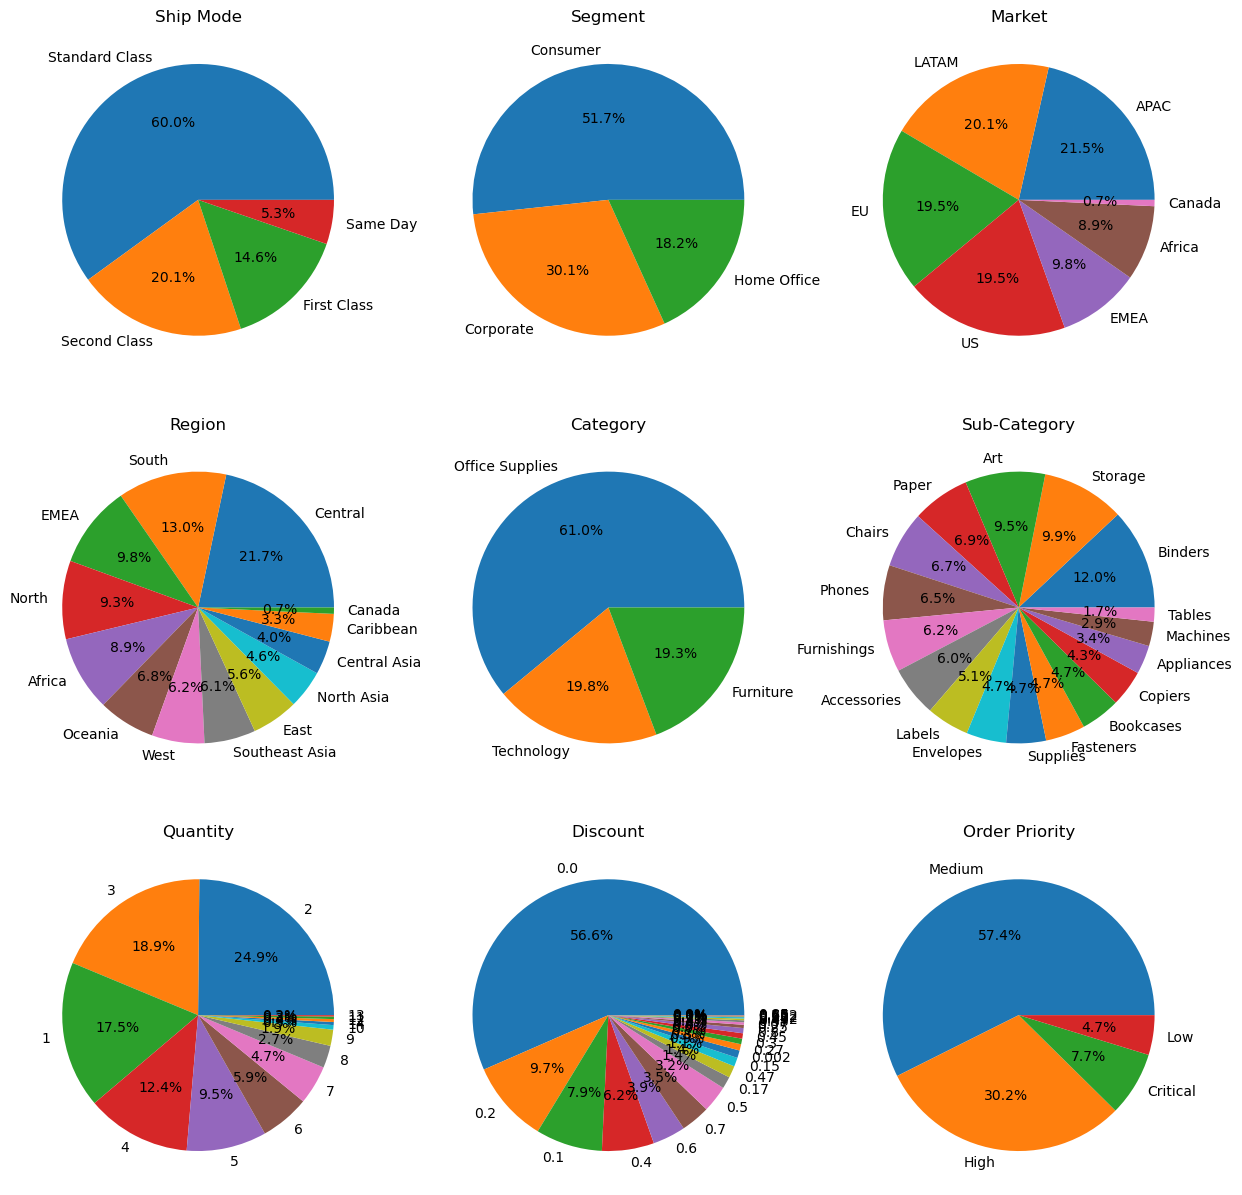

In [11]:
columns = ['Ship Mode', 'Segment', 'Market', 'Region', 'Category', 'Sub-Category',
       'Quantity', 'Discount', 'Order Priority']
plt.figure(figsize=(15,15))
for col in columns:
  count_values = df[col].value_counts()
  print(count_values,end='\n\n')
  plt.subplot(3,3,columns.index(col)+1)
  plt.title(col)    
  plt.pie(count_values,labels=count_values.index,autopct='%1.1f%%')
  plt.axis('off')
plt.show()

### Data Preparation

#### Data Cleansing

In [12]:
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [13]:
df.duplicated().sum()

np.int64(0)

##### Handle Missing Value

In [14]:
print('Is there any missing value present or not?',df.isnull().values.any())
missing_percentage = df.isnull().sum()*100/len(df)
missing_value_df = pd.DataFrame({'missing_count': df.isnull().sum(),'missing_percentage': missing_percentage})
missing_value_df[missing_value_df.missing_count != 0]

Is there any missing value present or not? True


missing_count  missing_percentage
Postal Code          41296            80.51472

In [15]:
df = df.drop(['Postal Code'], axis=1)

In [16]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64

In [17]:
df.duplicated().sum()

np.int64(0)

In [18]:
# Convert Order Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

C:\Users\Vstore Computer\AppData\Local\Temp\ipykernel_9572\712819524.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


##### Feature Engineering

In [19]:
# Extract Year & Month
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month_name()

In [20]:
# Create Profit Margin
df['Profit Margin'] = df['Profit'] / df['Sales']

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  object        
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Market          51290 non-null  object        
 12  Region          51290 non-null  object        
 13  Product ID      51290 non-null  object        
 14  Category        51290 non-null  object        
 15  Su

### Visualization

##### A. Sales Trends Over Time

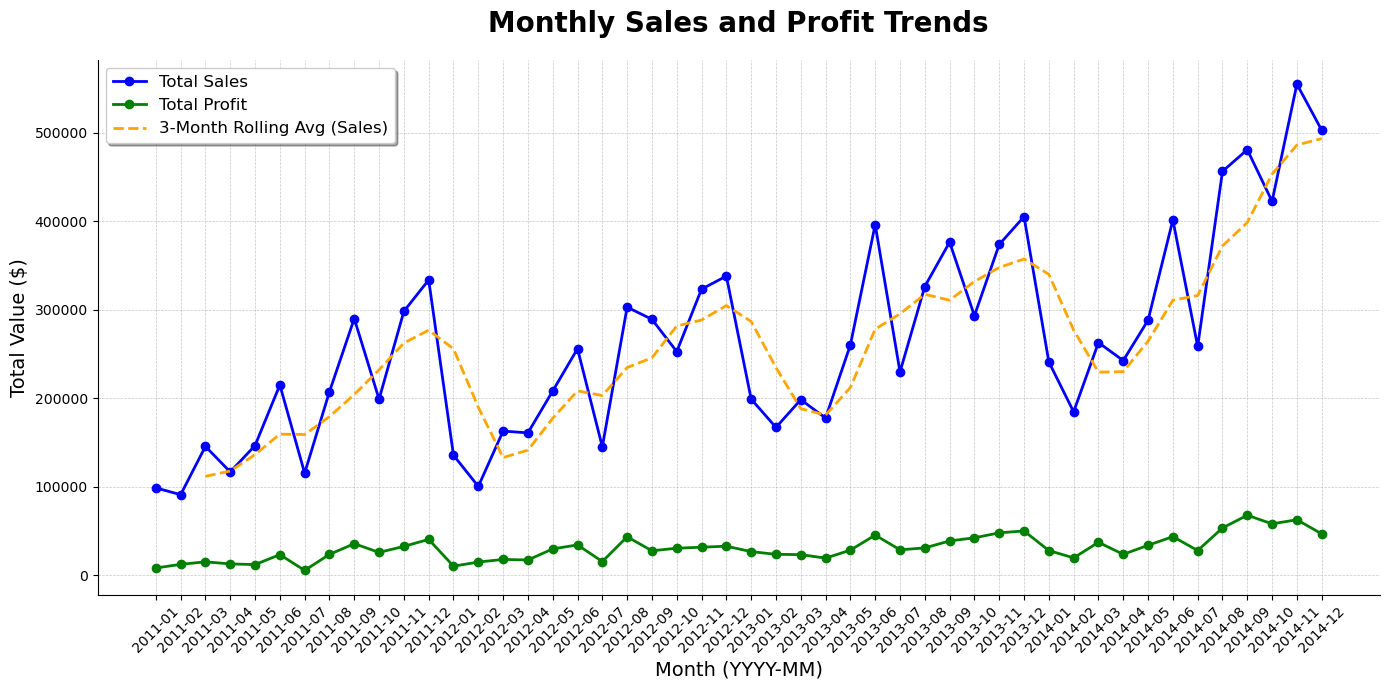

In [22]:
df['YearMonth'] = df['Order Date'].dt.to_period('M')
monthly_data = df.groupby('YearMonth')[['Sales', 'Profit']].sum()
monthly_data.index = monthly_data.index.astype(str)
monthly_data['3M Rolling Avg'] = monthly_data['Sales'].rolling(3).mean()
fig, ax = plt.subplots(figsize=(14, 7))

# Plot the Sales line
ax.plot(
    monthly_data.index, 
    monthly_data['Sales'], 
    label='Total Sales', 
    marker='o', 
    linestyle='-', 
    color='b', 
    linewidth=2
)
# Plot the Profit line
ax.plot(
    monthly_data.index, 
    monthly_data['Profit'], 
    label='Total Profit', 
    marker='o', 
    linestyle='-', 
    color='g', 
    linewidth=2
)
# Plot the 3-Month Rolling Average line for Sales
ax.plot(
    monthly_data.index, 
    monthly_data['3M Rolling Avg'], 
    label='3-Month Rolling Avg (Sales)', 
    linestyle='--', 
    color='orange', 
    linewidth=2
)

ax.set_title('Monthly Sales and Profit Trends', fontsize=20, fontweight='bold', pad=20)
ax.set_xlabel('Month (YYYY-MM)', fontsize=14)
ax.set_ylabel('Total Value ($)', fontsize=14)

ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

plt.xticks(rotation=45)
ax.legend(fontsize=12, frameon=True, shadow=True, fancybox=True)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('SPT.png')
plt.show()

##### B. Product & Category Insights

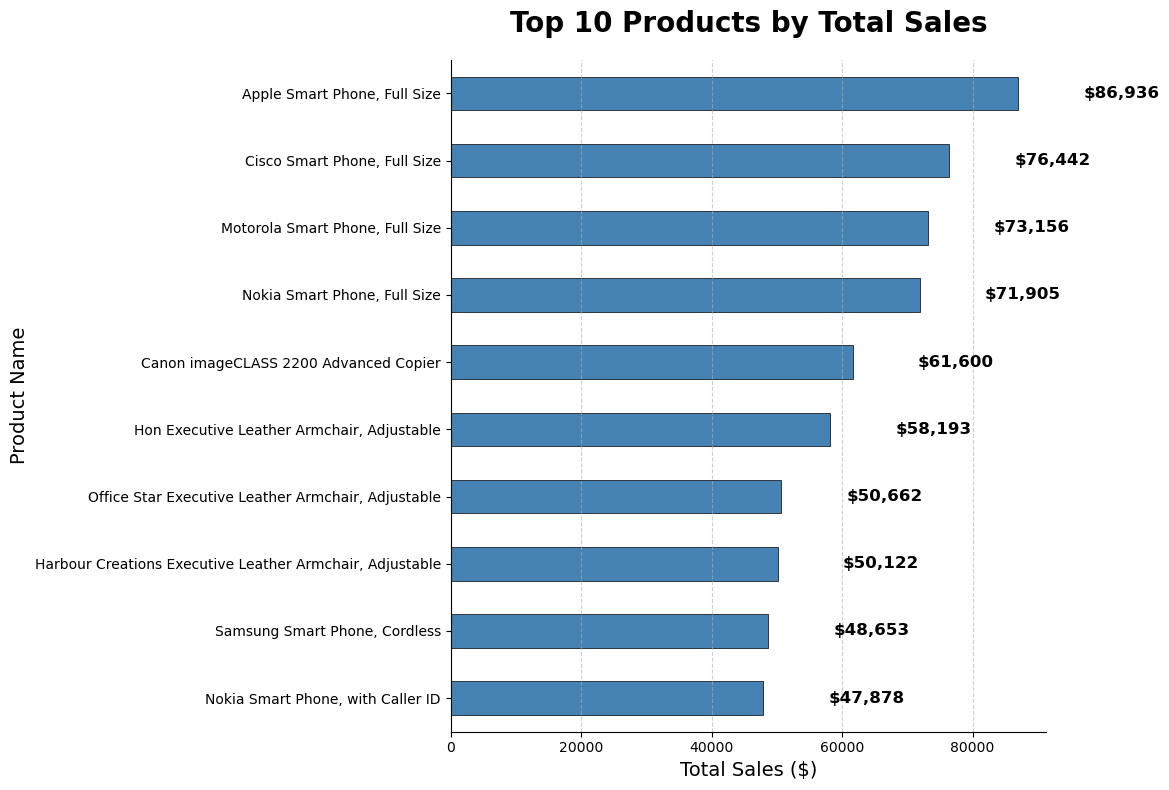

In [23]:
top_products = df.groupby('Product Name')['Sales'].sum().nlargest(10).sort_values(ascending=True)

fig, ax = plt.subplots(figsize=(12, 8))
bar_color = '#4682B4'

top_products.plot(
    kind='barh',
    ax=ax,
    color=bar_color,
    edgecolor='black', 
    linewidth=0.5
)

ax.set_title(
    'Top 10 Products by Total Sales', 
    fontsize=20, 
    fontweight='bold',
    pad=20
)
ax.set_xlabel('Total Sales ($)', fontsize=14)
ax.set_ylabel('Product Name', fontsize=14)


for index, value in enumerate(top_products):
    ax.text(
        value + 10000, 
        index, 
        f'${value:,.0f}', 
        ha='left', 
        va='center', 
        fontsize=12,
        fontweight='bold'
    )

ax.grid(axis='x', linestyle='--', alpha=0.6)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('PCITop10.png')
plt.show()

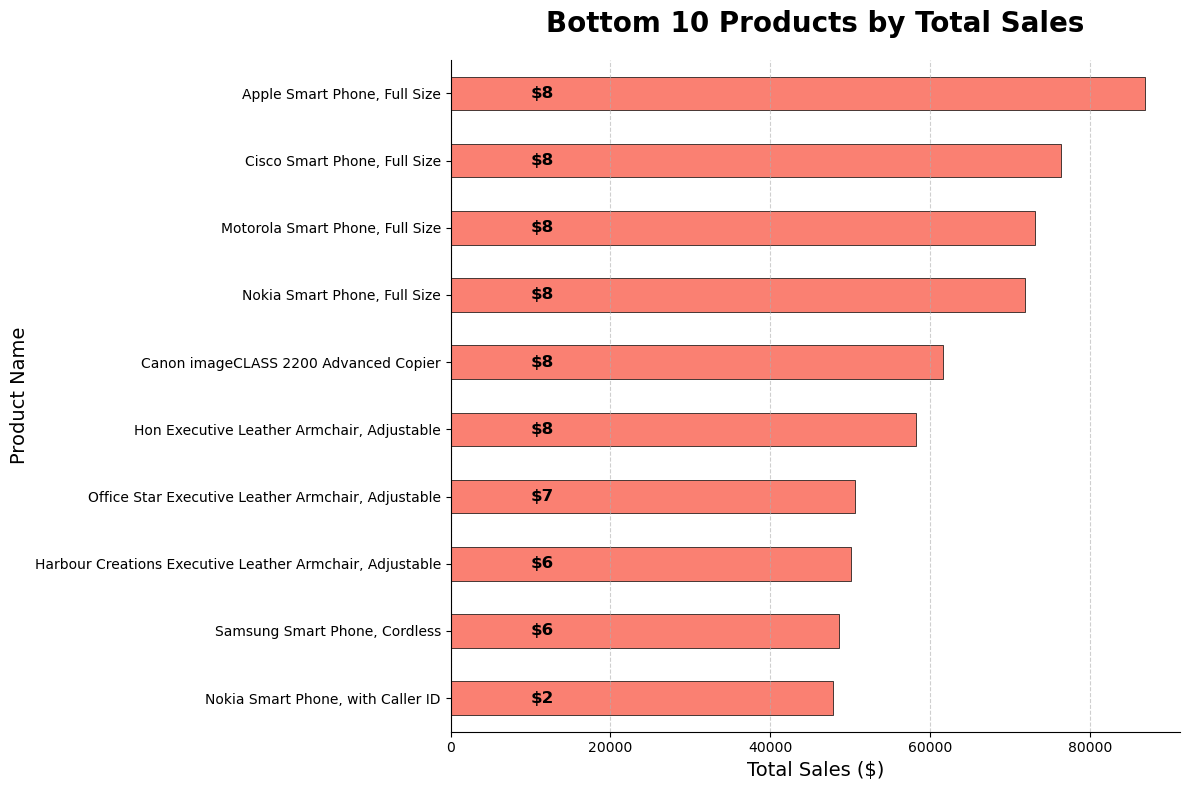

In [24]:
bottom_products = df.groupby('Product Name')['Sales'].sum().nsmallest(10).sort_values(ascending=True)

fig, ax = plt.subplots(figsize=(12, 8))
bar_color = "salmon"

top_products.plot(
    kind='barh',
    ax=ax,
    color=bar_color,
    edgecolor='black', 
    linewidth=0.5
)

ax.set_title(
    'Bottom 10 Products by Total Sales', 
    fontsize=20, 
    fontweight='bold',
    pad=20
)
ax.set_xlabel('Total Sales ($)', fontsize=14)
ax.set_ylabel('Product Name', fontsize=14)


for index, value in enumerate(bottom_products):
    ax.text(
        value + 10000, 
        index, 
        f'${value:,.0f}', 
        ha='left', 
        va='center', 
        fontsize=12,
        fontweight='bold'
    )

ax.grid(axis='x', linestyle='--', alpha=0.6)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('PCIBottom10.png')
plt.show()

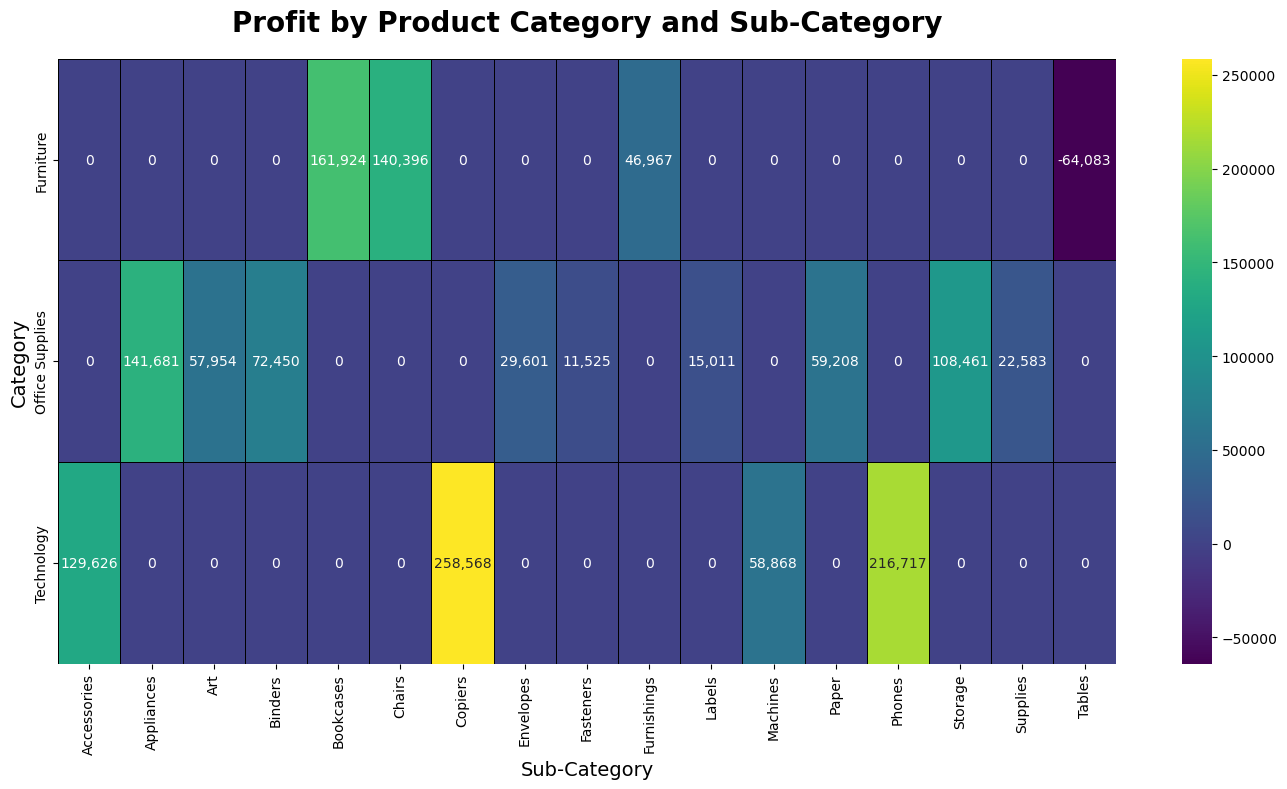

In [25]:
pivot_table = df.pivot_table(
    values='Profit',
    index='Category',
    columns='Sub-Category',
    aggfunc='sum',
    fill_value=0
)

fig, ax = plt.subplots(figsize=(14, 8))
sns.heatmap(
    pivot_table,
    ax=ax,
    annot=True,
    fmt=',.0f',
    cmap='viridis',
    linewidths=0.5,
    linecolor='black'
)

ax.set_title(
    'Profit by Product Category and Sub-Category',
    fontsize=20,
    fontweight='bold',
    pad=20
)
ax.set_xlabel('Sub-Category', fontsize=14)
ax.set_ylabel('Category', fontsize=14)

plt.tight_layout()
plt.savefig('PCIHeatmap.png')
plt.show()

##### C. Customer & Regional Insights

C:\Users\Vstore Computer\AppData\Local\Temp\ipykernel_9572\3880323788.py:3: DeprecationWarning: The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.
  fig = px.choropleth(


Plotly figure saved successfully as CRIChoro.png


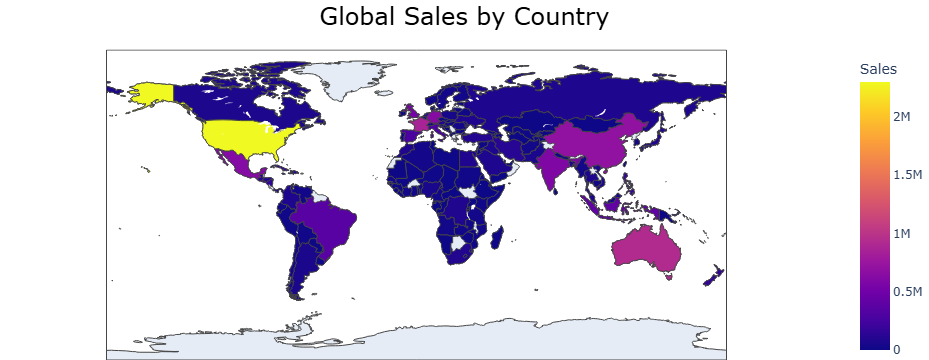

In [26]:
country_sales = df.groupby('Country')['Sales'].sum().reset_index()

fig = px.choropleth(
    country_sales,
    locations='Country',
    locationmode='country names', 
    color='Sales',
    scope='world',
    title='Global Sales by Country',
    color_continuous_scale=px.colors.sequential.Plasma, 
    hover_name='Country',
    hover_data={'Sales': ':, .0f'} 
)

fig.update_layout(
    title_font_size=24,
    title_font_color='black',
    title_x=0.5, 
    margin={'r': 0, 't': 50, 'l': 0, 'b': 0}
)

pio.write_image(fig, 'CRIChoro.png', scale=2, width=1200, height=800)
print("Plotly figure saved successfully as CRIChoro.png")
fig.show()

In [27]:
segment_sales = df.groupby('Segment')['Sales'].sum().reset_index()

segment_sales = segment_sales.sort_values(by='Sales', ascending=False)

fig = px.pie(
    segment_sales,
    values='Sales',
    names='Segment',
    hole=0.5, 
    title='Total Sales Contribution by Customer Segment',
    color_discrete_sequence=px.colors.sequential.Plasma,
)

fig.update_traces(
    textposition='inside',
    textinfo='percent+label', 
    pull=[0.05 if s == segment_sales['Segment'].iloc[0] else 0 for s in segment_sales['Segment']],
    insidetextfont=dict(color='white')
)

fig.update_layout(
    title_font_size=24,
    title_font_color='black',
    title_x=0.5,
    showlegend=False 
)


pio.write_image(fig, 'CRIPie.png', scale=2, width=1200, height=800)
print("Plotly figure saved successfully as CRIPie.png")

fig.show()

Plotly figure saved successfully as CRIPie.png


##### D. Discount Impact

In [28]:
fig = px.scatter(df,
                 x="Discount",
                 y="Profit",
                 size="Sales",
                 color="Profit",  
                 color_continuous_scale=px.colors.sequential.Viridis,
                 hover_data=["Product Name", "Region"],
                 title="Relationship Between Discount, Sales, and Profit",
                 labels={"Discount": "Discount Rate (%)", "Profit": "Profit ($)"},
                 trendline="ols")

fig.update_layout(
    title={
        'text': "Relationship Between Discount, Sales, and Profit",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title="Discount",
    yaxis_title="Profit",
    font=dict(family="Arial", size=12, color="#7f7f7f")
)

pio.write_image(fig, 'DIScatter.png', scale=2, width=1200, height=800)
print("Plotly figure saved successfully as DIScatter.png")
fig.show()

WARNING	Thread(Thread-8 (run)) Task(Task-83) choreographer.browser_async:browser_async.py:_close()- Resorting to unclean kill browser.


Plotly figure saved successfully as DIScatter.png


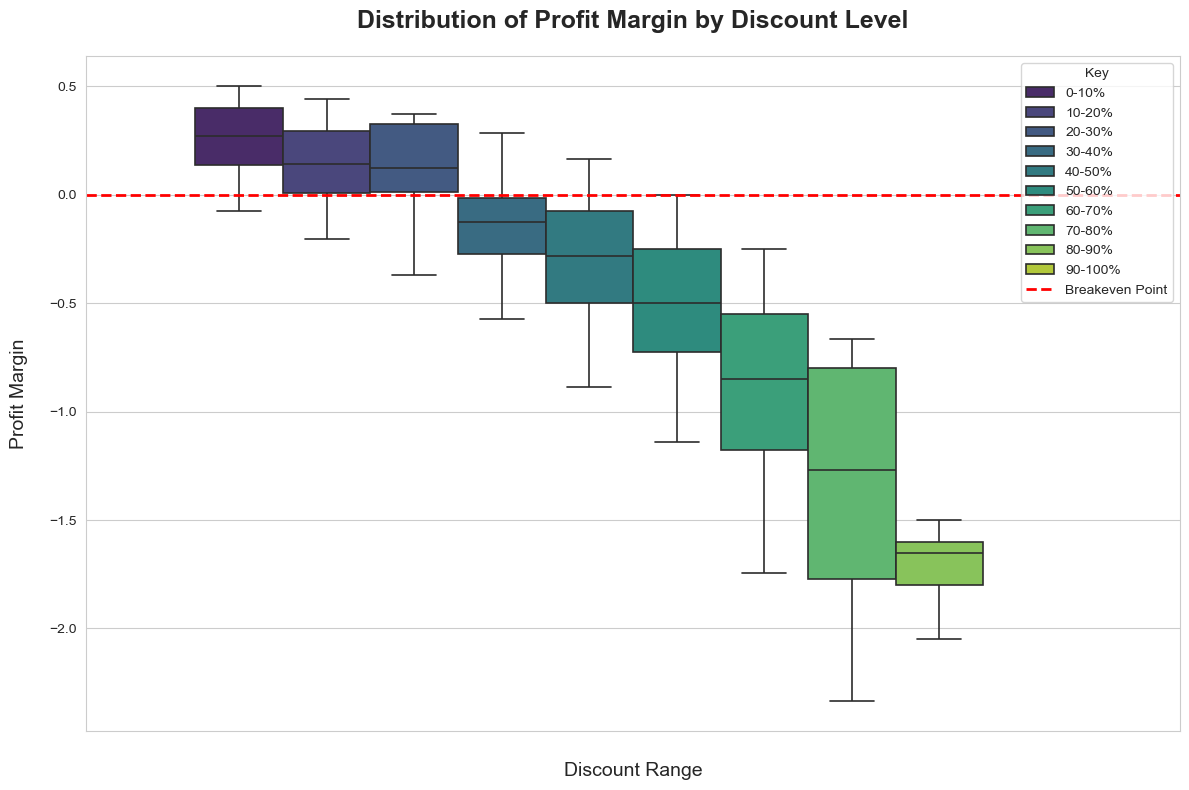

In [32]:
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
labels = [f'{int(b*100)}-{int((b+0.1)*100)}%' for b in bins[:-1]]
labels[-1] = '90-100%'


df["Discount_Bin"] = pd.cut(df["Discount"], bins=bins, labels=labels, right=False, include_lowest=True)

sns.set_style("whitegrid")


fig, ax = plt.subplots(figsize=(12, 8))


sns.boxplot(data=df, hue="Discount_Bin", y="Profit Margin",
            legend=True,
            palette="viridis", 
            showfliers=False, 
            linewidth=1.2,
            ax=ax)


ax.axhline(0, color='red', linestyle='--', linewidth=2, label='Breakeven Point')


plt.title("Distribution of Profit Margin by Discount Level", fontsize=18, fontweight='bold', pad=20)
plt.xlabel("Discount Range", fontsize=14, labelpad=15)
plt.ylabel("Profit Margin", fontsize=14, labelpad=15)
plt.xticks(rotation=45, ha='right', fontsize=10) 


ax.legend(title='Key', loc='upper right')


plt.tight_layout()

plt.savefig('DIBox_enhanced.png', dpi=400, bbox_inches='tight')

plt.show()

##### E. Seasonality & Patterns

WARNING	Thread(Thread-12 (run)) Task(Task-158) choreographer.browser_async:browser_async.py:_close()- Resorting to unclean kill browser.


Plotly figure saved successfully as SPTree.png


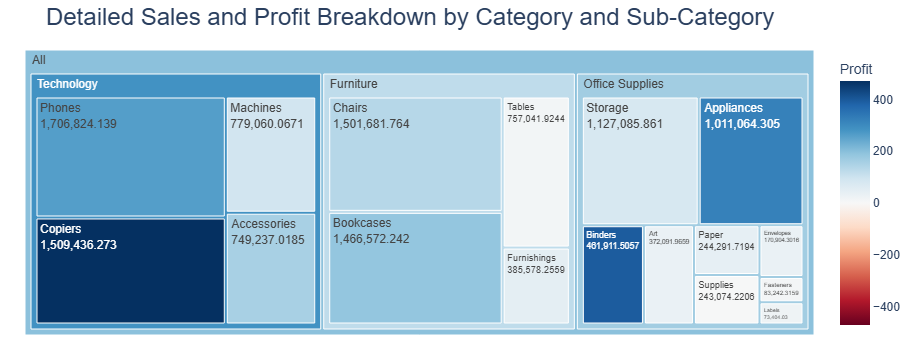

In [33]:
fig = px.treemap(
    df,
    path=[px.Constant("All"), "Category", "Sub-Category"],
    values="Sales",
    color="Profit",
    color_continuous_scale="RdBu",
    title="Detailed Sales and Profit Breakdown by Category and Sub-Category",
    color_continuous_midpoint=0,
    hover_data=["Sales", "Profit", "Quantity", "Discount"]
)


fig.update_layout(
    title_font_size=24,
    font=dict(family="Arial", size=12),
    margin=dict(t=50, l=25, r=25, b=25)
)

fig.update_traces(
    textinfo="label+value",
    hovertemplate="<b>%{label}</b><br><br>" +
                  "Sales: $%{value:,.2f}<br>" +
                  "Profit: $%{customdata[0]:,.2f}<br>" +
                  "Quantity: %{customdata[1]}<br>" +
                  "Discount: %{customdata[2]:.2%}<extra></extra>"
)

pio.write_image(fig, 'SPTree.png', scale=2, width=1200, height=1200)
print("Plotly figure saved successfully as SPTree.png")
fig.show()